In [69]:
import pandas as pd
file_path = './new_jobs.xlsx'
df = pd.read_excel(file_path)
df.iloc[:, 0] = df.iloc[:, 0].astype(str).str.lower()
df["skills"] = df["skills"].apply(lambda x: x.lower() if isinstance(x, str) else x)
df.head()



,location,title,text,apply_count,test_task_link,salary,year_of_experience,recruiter,employee,skills,createdAt
0,nan,NaN,NaN,NaN,NaN,NaN,NaN,$oid,NaN,NaN,$date
1,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$numberLong
2,nan,PHP Laravel or Codeigniter Trainees Hiring(App...,"A global company with an R&D office in Kyiv, U...",0.0,NaN,35370.0,1.0,662cf32332f07693975ed74c,NaN,"php,laravel,codeigniter",1703164229591
3,nan,IT PROFESSIONAL,"A global company with an R&D office in Kyiv, U...",0.0,NaN,95198.0,1.0,662cf32332f07693975ed74c,NaN,azure data factory oracle soa rpa salesforce d...,1687740181461
4,"харківська обл., ізюмський р-н, сщ.першотравневе",Full Stack Developer-PHP ( Lead ),"A global company with an R&D office in Kyiv, U...",0.0,NaN,55667.0,5.0,662cf32332f07693975ed74c,NaN,"php,codeigniter,php laravel",1714073570511


In [70]:
import nltk
from nltk import word_tokenize
# nltk.download('punkt')
df["skills"] = df["skills"].apply(lambda x: word_tokenize(str(x)) if isinstance(x, str) else '')
df.head()

,location,title,text,apply_count,test_task_link,salary,year_of_experience,recruiter,employee,skills,createdAt
0,nan,NaN,NaN,NaN,NaN,NaN,NaN,$oid,NaN,,$date
1,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,$numberLong
2,nan,PHP Laravel or Codeigniter Trainees Hiring(App...,"A global company with an R&D office in Kyiv, U...",0.0,NaN,35370.0,1.0,662cf32332f07693975ed74c,NaN,"[php, ,, laravel, ,, codeigniter]",1703164229591
3,nan,IT PROFESSIONAL,"A global company with an R&D office in Kyiv, U...",0.0,NaN,95198.0,1.0,662cf32332f07693975ed74c,NaN,"[azure, data, factory, oracle, soa, rpa, sales...",1687740181461
4,"харківська обл., ізюмський р-н, сщ.першотравневе",Full Stack Developer-PHP ( Lead ),"A global company with an R&D office in Kyiv, U...",0.0,NaN,55667.0,5.0,662cf32332f07693975ed74c,NaN,"[php, ,, codeigniter, ,, php, laravel]",1714073570511


In [71]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
df.iloc[:, 0] = df.iloc[:, 0].apply(lambda x: [word for word in x if word not in stop_words])
df['skills']

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lolak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0                                                       
1                                                       
2                      [php, ,, laravel, ,, codeigniter]
3      [azure, data, factory, oracle, soa, rpa, sales...
4                 [php, ,, codeigniter, ,, php, laravel]
                             ...                        
350    [pmp, ,, project, coordinators, ,, software, p...
351    [test, case, preparation, ,, manual, testing, ...
352    [selenium, ,, functional, testing, ,, manual, ...
353    [ms, azure, ,, sql, azure, ,, c, #, .net, ,, a...
354    [javascript, ,, web, stacks, ,, libraries, ,, ...
Name: skills, Length: 355, dtype: object

In [74]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
df.iloc[:, 0] = df.iloc[:, 0].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
df["skills"]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lolak\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0                                                       
1                                                       
2                      [php, ,, laravel, ,, codeigniter]
3      [azure, data, factory, oracle, soa, rpa, sales...
4                 [php, ,, codeigniter, ,, php, laravel]
                             ...                        
350    [pmp, ,, project, coordinators, ,, software, p...
351    [test, case, preparation, ,, manual, testing, ...
352    [selenium, ,, functional, testing, ,, manual, ...
353    [ms, azure, ,, sql, azure, ,, c, #, .net, ,, a...
354    [javascript, ,, web, stacks, ,, libraries, ,, ...
Name: skills, Length: 355, dtype: object

In [86]:
df["skills"].to_excel('./jobs_right_version.xlsx', index=False)

In [89]:
dfa = pd.read_excel('./jobs_right_version.xlsx');
dfa.head()

,skills
0,NaN
1,NaN
2,"['php', ',', 'laravel', ',', 'codeigniter']"
3,"['azure', 'data', 'factory', 'oracle', 'soa', ..."
4,"['php', ',', 'codeigniter', ',', 'php', 'larav..."


In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(min_df=20)
tfidf_matrix = tfidf_vectorizer.fit_transform(dfa.iloc[:, 0].astype('U'))

print(tfidf_matrix.shape)

(355, 12)


In [91]:
terms = tfidf_vectorizer.get_feature_names_out()

In [92]:
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=terms)
tfidf_df

,and,angular,api,developer,java,javascript,js,mvc,net,react,testing,web
0,0.000000,0.0,0.000000,0.0,0.00000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
1,0.000000,0.0,0.000000,0.0,0.00000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
2,0.000000,0.0,0.000000,0.0,0.00000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
3,0.000000,0.0,0.000000,0.0,0.71609,0.00000,0.0,0.000000,0.698008,0.0,0.000000,0.000000
4,0.000000,0.0,0.000000,0.0,0.00000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
350,0.000000,0.0,0.000000,0.0,0.00000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
351,0.389815,0.0,0.000000,0.0,0.00000,0.00000,0.0,0.000000,0.000000,0.0,0.825668,0.407820
352,0.223384,0.0,0.000000,0.0,0.00000,0.00000,0.0,0.000000,0.000000,0.0,0.946300,0.233702
353,0.000000,0.0,0.374494,0.0,0.00000,0.00000,0.0,0.415653,0.717091,0.0,0.000000,0.415653


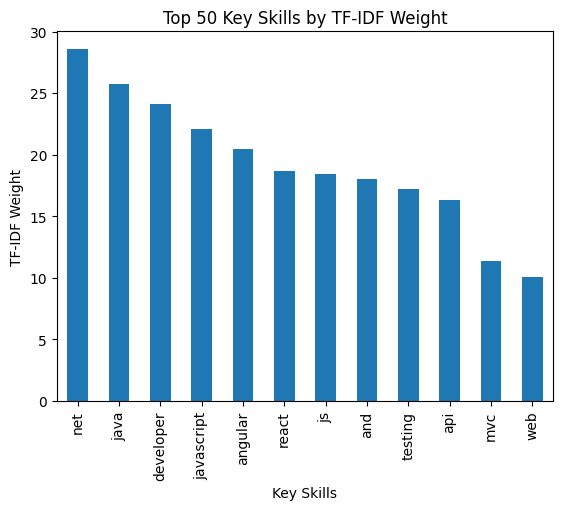

In [93]:
import matplotlib.pyplot as plt

# Гистограмма наиболее часто встречающихся терминов
tfidf_df.sum().sort_values(ascending=False).head(50).plot(kind='bar')
plt.title('Top 50 Key Skills by TF-IDF Weight')
plt.xlabel('Key Skills')
plt.ylabel('TF-IDF Weight')
plt.show()

In [94]:
terms = tfidf_vectorizer.get_feature_names_out()
print(terms)

['and' 'angular' 'api' 'developer' 'java' 'javascript' 'js' 'mvc' 'net'
 'react' 'testing' 'web']


In [95]:
from tqdm import tqdm

# DataFrame из TF-IDF матрицы
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=terms)
tqdm.pandas()

# Суммарные частоты встречаемости для каждого термина
term_frequencies = tfidf_df.progress_apply(lambda x: x.sum())

# DataFrame с терминами и их суммарными частотами встречаемости
term_freq_df = pd.DataFrame({'Term': terms, 'Frequency': term_frequencies})

# Сортировка по убыванию частот встречаемости
term_freq_df = term_freq_df.sort_values(by='Frequency', ascending=False)

print(term_freq_df.head())

100%|██████████| 12/12 [00:00<00:00, 6020.53it/s]

                  Term  Frequency
net                net  28.571738
java              java  25.778005
developer    developer  24.099734
javascript  javascript  22.105589
angular        angular  20.445280


In [96]:
term_freq_df.to_excel('./term_frequencies.xlsx', index=False)

In [101]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

data_for_clustering = tfidf_df.sample(frac=0.2, random_state=42)
num_clusters = 22
agglomerative_cluster = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')

print("Clustering in progress...")
agglomerative_labels = agglomerative_cluster.fit_predict(data_for_clustering)
print("Clustering completed.")

# Adding cluster labels to the DataFrame
data_for_clustering['agglomerative_cluster_label'] = agglomerative_labels

print(data_for_clustering[['agglomerative_cluster_label']])

Clustering in progress...
Clustering completed.
     agglomerative_cluster_label
227                           21
42                             7
256                            3
182                           19
56                             8
..                           ...
343                            1
196                           11
244                           11
93                             7
255                           13

[71 rows x 1 columns]


In [102]:
result_df = pd.DataFrame({
    'Cluster_Label': agglomerative_labels
})

result_df.to_csv('./result_of_clustering.csv', index=False)

print(result_df[['Cluster_Label']])

    Cluster_Label
0              21
1               7
2               3
3              19
4               8
..            ...
66              1
67             11
68             11
69              7
70             13

[71 rows x 1 columns]


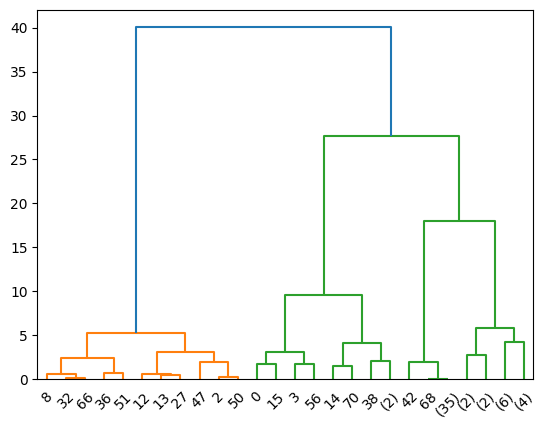

In [104]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt


linkage_matrix = linkage(data_for_clustering, method='ward')

dendrogram(linkage_matrix, truncate_mode='level', p=4)
plt.show()


Cophenetic Correlation Coefficient: 0.8380350573311558


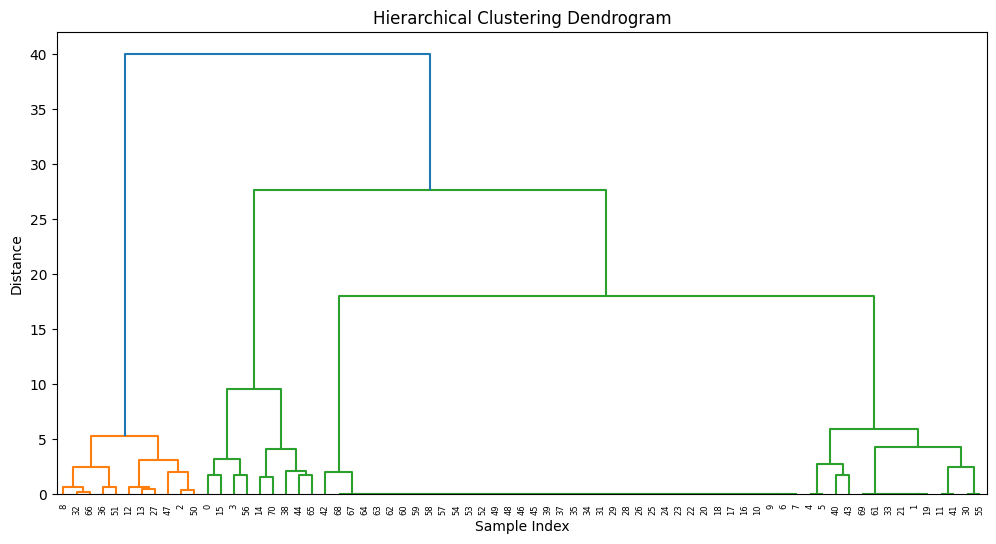

In [105]:
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist

# Построение иерархической кластеризации
Z = linkage_matrix

# Расчет cophenetic correlation coefficient
c, coph_dists = cophenet(Z, pdist(data_for_clustering))

print(f'Cophenetic Correlation Coefficient: {c}')

# Построение дендрограммы
plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [106]:
# Расчет cophenetic correlation coefficient
c, coph_dists = cophenet(Z, pdist(data_for_clustering))

print(f'Cophenetic Correlation Coefficient: {c}')

Cophenetic Correlation Coefficient: 0.8380350573311558


[t-SNE] Computing 70 nearest neighbors...
[t-SNE] Indexed 71 samples in 0.000s...
[t-SNE] Computed neighbors for 71 samples in 0.117s...
[t-SNE] Computed conditional probabilities for sample 71 / 71
[t-SNE] Mean sigma: 2.431429
[t-SNE] KL divergence after 250 iterations with early exaggeration: 31.534449
[t-SNE] KL divergence after 1000 iterations: -6.485178


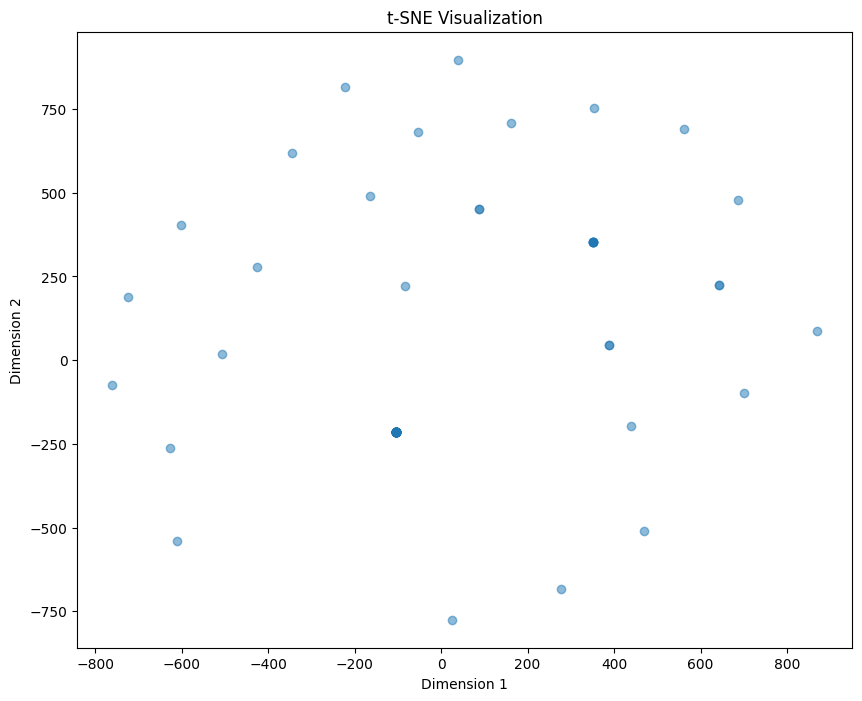

In [107]:
import numpy as np
from sklearn.manifold import TSNE

data_for_clustering
# Матрица терминов с весами tf-idf
data_tfidf_sne = data_for_clustering

# Экземпляр модели t-SNE с 2 компонентами (2D пространство)
tsne = TSNE(n_components=2, random_state=42, verbose=1, perplexity=40, learning_rate=30, n_iter=1000)

data_tsne = tsne.fit_transform(data_tfidf_sne)

plt.figure(figsize=(10, 8))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], alpha=0.5)
plt.title('t-SNE Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

In [108]:
from scipy.cluster.hierarchy import fcluster

# Максимальное расстояние для формирования кластеров
max_distance = 1

# Получение информации о кластерах для каждого уровня расстояния
clusters = fcluster(Z, max_distance, criterion='distance')

# Вывод числа кластеров для каждого уровня расстояния
for i in range(min(clusters), max(clusters) + 1):
    num_clusters = sum(clusters == i)
    print(f'Clusters at distance {i}: {num_clusters}')

Clusters at distance 1: 3
Clusters at distance 2: 2
Clusters at distance 3: 3
Clusters at distance 4: 2
Clusters at distance 5: 1
Clusters at distance 6: 1
Clusters at distance 7: 1
Clusters at distance 8: 1
Clusters at distance 9: 1
Clusters at distance 10: 1
Clusters at distance 11: 1
Clusters at distance 12: 1
Clusters at distance 13: 1
Clusters at distance 14: 1
Clusters at distance 15: 36
Clusters at distance 16: 1
Clusters at distance 17: 2
Clusters at distance 18: 1
Clusters at distance 19: 1
Clusters at distance 20: 6
Clusters at distance 21: 2
Clusters at distance 22: 2


In [114]:
tsne_df = pd.DataFrame({
    'tsne_1': data_tsne_x[:, 0],
    'tsne_2': data_tsne_x[:, 1],
    'agglomerative_cluster_label': data_for_clustering['agglomerative_cluster_label']
})

# Результаты с цветовой схемой, отражающей метки кластеров
plt.figure(figsize=(15, 13))
sns.scatterplot(x='tsne_1', y='tsne_2', hue='agglomerative_cluster_label', data=tsne_df, palette='viridis', legend='full')
plt.title('t-SNE Visualization with Cluster Labels')
plt.show()

NameError: name 'data_tsne_x' is not defined